In [298]:
import pandas as pd
import spotler.api.model_data.model_data_lib as modlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import top_k_accuracy_score


In [299]:
track_genres_query = modlib.TRACK_GENRE_SQL_QUERY
track_simple_genres_query = modlib.TRACK_SIMPLE_GENRE_SQL_QUERY

db_path = "spotler/db.sqlite3"
csv_name = "track_genres.csv"
csv_simple_genre_name = "track_simple_genres.csv"

In [300]:
modlib.create_csv_from_query(db_path, csv_name,track_genres_query,"\t")

['track_id', 'name', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'loudness', 'liveness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'genre_name']


In [301]:
df = pd.read_csv(csv_name, sep="[\t]")

/tmp/ipykernel_8981/1184186776.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(csv_name, sep="[\t]")


In [302]:
genres_freq = df["genre_name"].value_counts()
genres_freq = pd.DataFrame({"genres_number":genres_freq.index, "genres_appear":genres_freq.values})["genres_appear"].value_counts()

In [303]:
df.head()

,track_id,name,acousticness,danceability,energy,instrumentalness,key,loudness,liveness,mode,speechiness,tempo,time_signature,valence,genre_name
0,1Qrg8KqiBpW07V7PNxwwwL,Kill Bill,0.0521,0.644,0.735,0.144,8,-5.747,0.161,1,0.0391,88.980,4,0.418,pop
1,1Qrg8KqiBpW07V7PNxwwwL,Kill Bill,0.0521,0.644,0.735,0.144,8,-5.747,0.161,1,0.0391,88.980,4,0.418,r&b
2,1Qrg8KqiBpW07V7PNxwwwL,Kill Bill,0.0521,0.644,0.735,0.144,8,-5.747,0.161,1,0.0391,88.980,4,0.418,rap
3,7ro0hRteUMfnOioTFI5TG1,WHERE SHE GOES,0.1430,0.652,0.800,0.629,9,-4.019,0.112,0,0.0614,143.978,4,0.234,reggaeton
4,7ro0hRteUMfnOioTFI5TG1,WHERE SHE GOES,0.1430,0.652,0.800,0.629,9,-4.019,0.112,0,0.0614,143.978,4,0.234,trap latino


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          148506 non-null  object 
 1   name              148506 non-null  object 
 2   acousticness      148506 non-null  float64
 3   danceability      148506 non-null  float64
 4   energy            148506 non-null  float64
 5   instrumentalness  148506 non-null  float64
 6   key               148506 non-null  int64  
 7   loudness          148506 non-null  float64
 8   liveness          148506 non-null  float64
 9   mode              148506 non-null  int64  
 10  speechiness       148506 non-null  float64
 11  tempo             148506 non-null  float64
 12  time_signature    148506 non-null  int64  
 13  valence           148506 non-null  float64
 14  genre_name        148506 non-null  object 
dtypes: float64(9), int64(3), object(3)
memory usage: 17.0+ MB


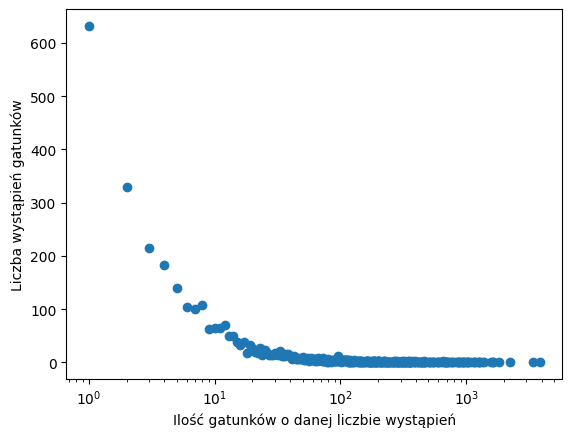

In [305]:
fig,ax  =plt.subplots()
ax.scatter(genres_freq.index,genres_freq.values)
plt.xlabel("Ilość gatunków o danej liczbie wystąpień")
plt.ylabel("Liczba wystąpień gatunków")
plt.xscale("log")

plt.show()

In [306]:
modlib.create_csv_from_query(db_path,csv_simple_genre_name,track_simple_genres_query,"\t")

['track_id', 'name', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'loudness', 'liveness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'simplyfied_name']


In [307]:
df = pd.read_csv(csv_simple_genre_name, sep="[\t]")

/tmp/ipykernel_8981/2989146857.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(csv_simple_genre_name, sep="[\t]")


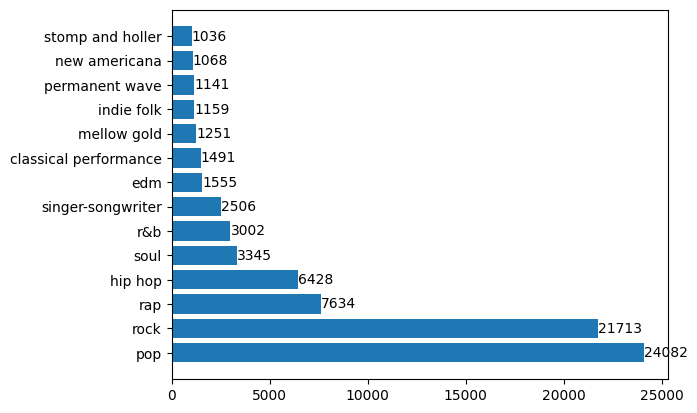

In [320]:

simplified_genre_count = (df["simplyfied_name"].value_counts())
fig,ax  =plt.subplots()

bars =ax.barh(simplified_genre_count.index,simplified_genre_count.values)
ax.bar_label(bars)

plt.show()


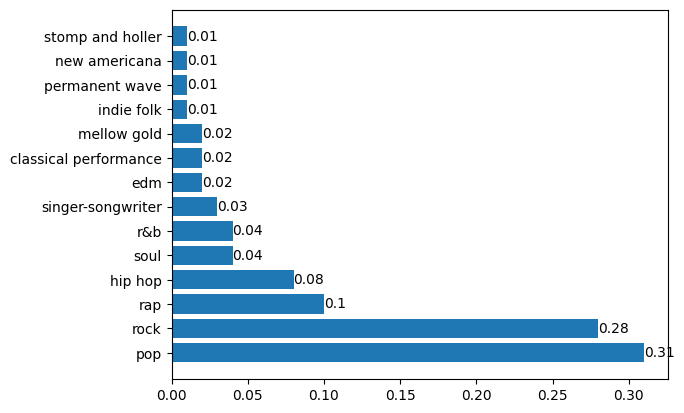

In [309]:
sum = simplified_genre_count.values.sum()
fig,ax = plt.subplots()
bars = ax.barh(simplified_genre_count.index,
               list(map(lambda amount: round(amount/sum,2),simplified_genre_count.values)))
ax.bar_label(bars)
plt.show()

Badanie cech ilościowych

In [310]:

def chart_value_count(dataframe, index):
    if index in dataframe:
        counts = dataframe[index].value_counts()
        return counts.index, counts.values

def create_multiple_charts(df,index_keys, axis, number_of_columns):
    for index, index_key in enumerate(index_keys):
        row_number = int(index/number_of_columns)
        data_count = chart_value_count(df, index_key)
        axis[row_number,index-row_number*number_of_columns].scatter(
            data_count[0], data_count[1], s=0.5
        )

        axis[row_number,index-row_number*number_of_columns].set_title(index_key)
        axis[row_number,index-row_number*number_of_columns].set_xlabel("value")
        axis[row_number,index-row_number*number_of_columns].set_ylabel("occurances")




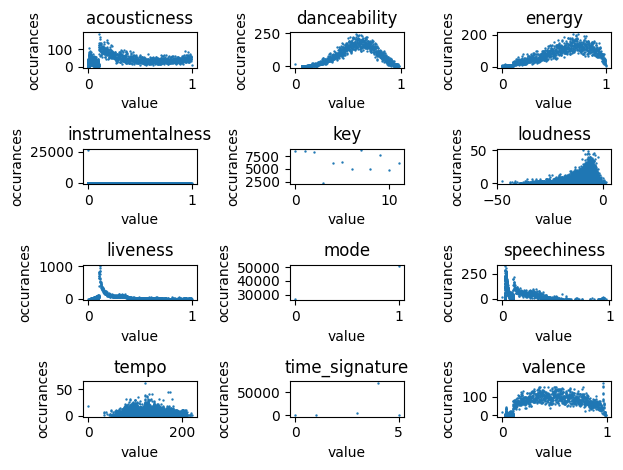

In [311]:
figure, axis =plt.subplots(4,3)
column_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                 'key', 'loudness', 'liveness', 'mode', 'speechiness', 
                 'tempo', 'time_signature', 'valence']

create_multiple_charts(df,column_names,axis,3)

plt.tight_layout()
plt.show()


/tmp/ipykernel_8981/3238854995.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


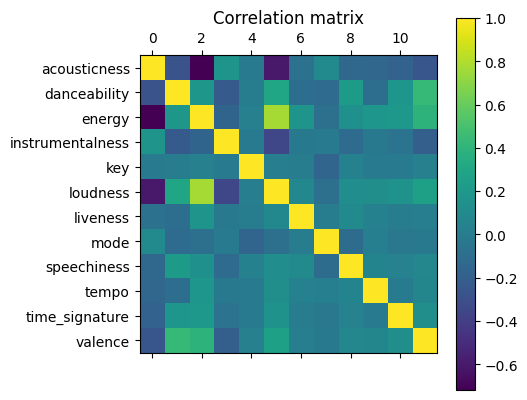

In [312]:
corr = df[column_names].corr()
plt.matshow(corr)
plt.tight_layout()
plt.title("Correlation matrix")
plt.colorbar()
#plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [313]:


X_train, X_test, Y_train, Y_test = train_test_split(df[column_names].values, 
                                                    df["simplyfied_name"].values, test_size=0.2,
                                                      random_state=42, stratify=df["simplyfied_name"].values)


In [314]:
lda = LinearDiscriminantAnalysis()
lda.fit_transform(X_train,Y_train)

array([[-1.1677691 , -0.32326033, -1.40532135, ...,  0.15386996,
         0.72647681, -0.20053148],
       [ 1.53136191, -0.22961347,  0.24701534, ...,  0.22212367,
        -0.15913696, -0.16709539],
       [-2.37347713, -1.66963803, -0.95527575, ...,  0.34431633,
        -0.26809637,  2.2696828 ],
       ...,
       [ 0.3129094 ,  0.17938053, -0.56520991, ...,  0.32808893,
         2.01275289,  1.97466628],
       [-1.22538267,  0.12207078, -0.59330415, ..., -1.33787042,
         0.28504505, -0.34150137],
       [-0.76178266, -0.5961052 , -1.15103869, ..., -0.91857271,
         0.8001339 , -0.29035697]])

In [315]:
weights =compute_class_weight('balanced',classes=np.unique(Y_test), y=Y_test)

In [316]:
def get_predicted_genres(classes, result_prob):
        
        result = [{"genre":prob_class, "probability":prob_value} for prob_class, prob_value in zip(classes, result_prob[0])]
        result.sort(key=lambda el: el["probability"], reverse=True)               
        return result

def get_predicted_genre_proba(classes,classname, result_prob):
        predicted_map = get_predicted_genres(classes, result_prob)
        return list(filter(lambda class_prob: class_prob["genre"]==classname,predicted_map))[0]["probability"]


In [317]:

Y_score = [lda.predict_proba([x])[0] for x in X_test]

top_k_accuracy_score(Y_test, Y_score, k=2)


0.6813279080281599

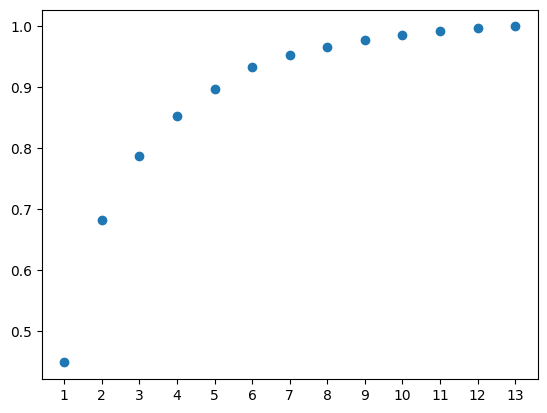

In [318]:
fig,ax = plt.subplots()
bars = ax.scatter(range(1,len(lda.classes_)), [top_k_accuracy_score(Y_test, Y_score, k=k) for k in range(1,len(lda.classes_))])
ax.set_xticks(range(1,len(lda.classes_)))
plt.show()

In [319]:
lda.score(X_test,Y_test)


0.4478460246722211